<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/BIG_DATA_AI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The topic in this project is about anime acclaim. We want to know whether the sales drop since COVID-19 have been affecting the anime ratings and the number of audience.

# Explore and Clean Data

In [104]:
# Update version for Time Series analysis
!pip install statsmodels --upgrade

In [105]:
# Do not show warnings
import warnings
warnings.filterwarnings("ignore")

In [106]:
# Import scraped data. The scraping is done with Web Scraper as a Google Chrome extension.
# The process took 9 hours.
import pandas as pd
df = pd.read_csv("project_mal.csv")
df_clean = df.copy()

## General Info

In [107]:
# Data sample
df.head()

,web-scraper-order,web-scraper-start-url,season,season-href,anime,anime-href,name,score,rank,popularity,members,season_repeat,type,studio
0,1648530274-1492,https://myanimelist.net/anime/season/archive,Spring 2004,https://myanimelist.net/anime/season/2004/spring,Morizo to Kikkoro,https://myanimelist.net/anime/12613/Morizo_to_...,Morizo to Kikkoro,NaN,#12665,#16458,205,Spring 2004,TV,NaN
1,1648528165-1160,https://myanimelist.net/anime/season/archive,Fall 2001,https://myanimelist.net/anime/season/2001/fall,Hikaru no Go,https://myanimelist.net/anime/135/Hikaru_no_Go,Hikaru no Go,8.08,#461,#1442,"123,926",Fall 2001,TV,Studio Pierrot
2,1648547113-4194,https://myanimelist.net/anime/season/archive,Spring 2018,https://myanimelist.net/anime/season/2018/spring,Caligula (TV),https://myanimelist.net/anime/36828/Caligula_TV,Caligula (TV),6.01,#8722,#2105,"71,817",Spring 2018,TV,Satelight
3,1648535227-2280,https://myanimelist.net/anime/season/archive,Spring 2009,https://myanimelist.net/anime/season/2009/spring,Shin Mazinger Shougeki! Z-hen,https://myanimelist.net/anime/5485/Shin_Mazing...,Shin Mazinger Shougeki! Z-hen,7.67,#1165,#4785,"14,062",Spring 2009,TV,Bee Media
4,1648535899-2387,https://myanimelist.net/anime/season/archive,Summer 2010,https://myanimelist.net/anime/season/2010/summer,Digimon Xros Wars,https://myanimelist.net/anime/8624/Digimon_Xro...,Digimon Xros Wars,6.68,#5296,#2765,"44,255",Summer 2010,TV,Toei Animation


In [108]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      5026 non-null   object 
 1   web-scraper-start-url  5026 non-null   object 
 2   season                 5026 non-null   object 
 3   season-href            5026 non-null   object 
 4   anime                  5026 non-null   object 
 5   anime-href             5026 non-null   object 
 6   name                   5026 non-null   object 
 7   score                  4080 non-null   float64
 8   rank                   4939 non-null   object 
 9   popularity             5026 non-null   object 
 10  members                5026 non-null   object 
 11  season_repeat          5026 non-null   object 
 12  type                   5026 non-null   object 
 13  studio                 4340 non-null   object 
dtypes: float64(1), object(13)
memory usage: 549.8+ KB


## Score

In [109]:
# Show anime with highest rating on MyAnimeList
score_rank = df[["anime", "score"]].sort_values(["score"], ascending=False)
score_rank.head(20)

,anime,score
2874,Fullmetal Alchemist: Brotherhood,9.15
3121,Steins;Gate,9.09
4255,Gintama?,9.09
3955,Shingeki no Kyojin Season 3 Part 2,9.08
1627,Shingeki no Kyojin: The Final Season Part 2,9.06
3710,Gintama',9.06
2967,Hunter x Hunter (2011),9.05
4581,Fruits Basket: The Final,9.04
1391,Gintama': Enchousen,9.04
4659,Gintama.,8.99


In [110]:
# Rating distribution information
df.describe()

,score
count,4080.000000
mean,6.867375
std,0.797936
min,2.940000
25%,6.340000
50%,6.870000
75%,7.390000
max,9.150000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82760ebb90>]],
      dtype=object)

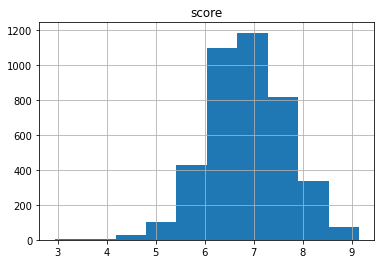

In [111]:
# Distribution of rating
score_rank.hist()

## Studio

In [112]:
# Count numbers of anime made by studios
studio_count = df.groupby(["studio"])["anime"].count().sort_values(ascending=False)
studio_count.head(20)

studio
Toei Animation          262
Sunrise                 178
Studio Deen             161
J.C.Staff               160
Madhouse                154
Nippon Animation        122
TMS Entertainment       114
Studio Pierrot          108
Tatsunoko Production    106
OLM                     103
A-1 Pictures             98
Production I.G           77
Gonzo                    73
Xebec                    72
DLE                      66
Bones                    61
Shin-Ei Animation        56
SILVER LINK.             56
Doga Kobo                55
Satelight                52
Name: anime, dtype: int64

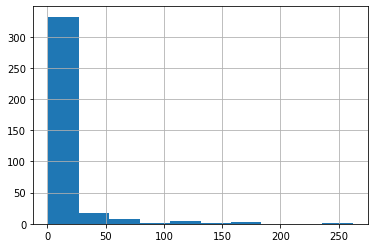

In [113]:
# Distribution of animes produced by studio
studio_count.hist()

## Ranking

In [114]:
# Some features has a "#" prefix; delete them
def delete_sharp(x):
  x = str(x)
  if x == "nan":
    return -1
  elif x[0] == "#":
    return int(x[1:])
  else:
    return x

In [115]:
# Clean ranking features and show highest rated animes. Null values not shown.
# Some rank are missing because they are not TV shows.
df_clean["rank"] = df_clean["rank"].apply(delete_sharp).astype(int)
ranking = df_clean[["anime", "rank"]][df_clean["rank"] > 0].sort_values("rank")
ranking.head(20)

,anime,rank
2874,Fullmetal Alchemist: Brotherhood,1
4255,Gintama?,2
3121,Steins;Gate,3
3955,Shingeki no Kyojin Season 3 Part 2,4
1627,Shingeki no Kyojin: The Final Season Part 2,5
3710,Gintama',6
2967,Hunter x Hunter (2011),8
4581,Fruits Basket: The Final,9
1391,Gintama': Enchousen,10
4659,Gintama.,12


## Popularity

In [116]:
# Clean popularity features and show most popular animes. Null values not shown.
# Some rank are missing because they are not TV shows.
df_clean["popularity"] = df_clean["popularity"].apply(delete_sharp).astype(int)
popularity = df_clean[["anime", "popularity"]][df_clean["popularity"] > 0].sort_values("popularity")
popularity.head(20)

,anime,popularity
1139,Shingeki no Kyojin,1
2210,Death Note,2
2874,Fullmetal Alchemist: Brotherhood,3
2405,One Punch Man,4
2973,Sword Art Online,5
1545,Boku no Hero Academia,6
3390,Tokyo Ghoul,7
220,Naruto,8
1823,Kimetsu no Yaiba,9
2967,Hunter x Hunter (2011),10


## Membership

In [117]:
# Some features have numbers seperated by comma (e.g., 1,234,500); delete them
def delete_comma(x):
  x = str(x)
  if x == "nan":
    return -1
  return int(x.replace(",", ""))

In [118]:
# Clean membership features and show animes with the most audience. Null values not shown.
df_clean["members"] = df_clean["members"].apply(delete_comma).astype(int)
membership = df_clean[["anime", "members"]][df_clean["members"] > 0].sort_values("members", ascending=False)
membership.head(20)

,anime,members
1139,Shingeki no Kyojin,3340909
2210,Death Note,3331576
2874,Fullmetal Alchemist: Brotherhood,2822351
2405,One Punch Man,2731807
2973,Sword Art Online,2701850
1545,Boku no Hero Academia,2570234
3390,Tokyo Ghoul,2436823
220,Naruto,2426258
1823,Kimetsu no Yaiba,2339213
2967,Hunter x Hunter (2011),2301610


## Seasons

In [119]:
# Count number of animes for each season and order them from most to least
season_count = df.groupby(["season"])["anime"].count().sort_values(ascending=False)
season_count.head(20)

season
Spring 2017    84
Fall 2016      80
Spring 2018    76
Spring 2016    75
Spring 2006    72
Spring 2014    72
Fall 2017      70
Spring 2011    70
Fall 2018      66
Fall 2015      65
Spring 2015    64
Summer 2016    63
Spring 2020    63
Spring 2021    62
Summer 2015    61
Winter 2021    61
Spring 2007    60
Spring 2013    59
Summer 2018    59
Summer 2017    59
Name: anime, dtype: int64

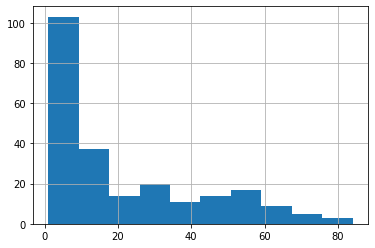

In [120]:
# Distribution of animes in a season
season_count.hist()

# Preprocess Data

## Into Time Series

In [121]:
# Only select relevant features
df_time = df_clean[["season", "anime", "score", "rank", "popularity", "members"]]
df_time.head()

,season,anime,score,rank,popularity,members
0,Spring 2004,Morizo to Kikkoro,NaN,12665,16458,205
1,Fall 2001,Hikaru no Go,8.08,461,1442,123926
2,Spring 2018,Caligula (TV),6.01,8722,2105,71817
3,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062
4,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255


In [122]:
# Drop null scores and null membership. (Will be used to calculate acclaim feature)
df_time = df_time.dropna(subset = ["score", "members"])
df_time.head()

,season,anime,score,rank,popularity,members
1,Fall 2001,Hikaru no Go,8.08,461,1442,123926
2,Spring 2018,Caligula (TV),6.01,8722,2105,71817
3,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062
4,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255
5,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262


In [123]:
# Order anime seasons from oldest (low) to newest (high). (1917 has the oldest anime listed in MyAnimeList)
def get_time(x):
  season, year = x.split(" ")[0], int(x.split(" ")[1])
  season_order = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
  return (year - 1917) * 4 + season_order[season]

In [124]:
# Check order of anime seasons
if ("time" not in df_time.columns):
  df_time.insert(0, "time", df["season"].apply(get_time))
df_time[["time", "season"]].head(10)

,time,season
1,339,Fall 2001
2,405,Spring 2018
3,369,Spring 2009
4,374,Summer 2010
5,201,Spring 1967
7,378,Summer 2011
8,373,Spring 2010
9,351,Fall 2004
10,349,Spring 2004
11,327,Fall 1998


In [125]:
# Shows number of anime in each season.
# For cross-checking with MyAnimeList to see if the scraped data is complete.
pd.set_option("display.max_rows", 1000)
check_group = df_time.groupby("time")
df_check = pd.DataFrame(data={"season": check_group["season"].first(), "count": check_group["anime"].count()})
print(df_check)
pd.reset_option("display.max_rows")

           season  count
time                    
177   Spring 1961      1
182   Summer 1962      1
184   Winter 1963      1
187     Fall 1963      3
188   Winter 1964      1
189   Spring 1964      1
190   Summer 1964      1
194   Summer 1965      3
195     Fall 1965      1
196   Winter 1966      1
197   Spring 1966      1
198   Summer 1966      1
199     Fall 1966      3
200   Winter 1967      2
201   Spring 1967      4
204   Winter 1968      1
205   Spring 1968      3
207     Fall 1968      3
208   Winter 1969      2
209   Spring 1969      3
211     Fall 1969      4
212   Winter 1970      1
213   Spring 1970      3
215     Fall 1970      3
216   Winter 1971      2
217   Spring 1971      2
219     Fall 1971      8
220   Winter 1972      3
221   Spring 1972      3
222   Summer 1972      1
223     Fall 1972      3
224   Winter 1973      4
225   Spring 1973      2
227     Fall 1973      8
228   Winter 1974      1
229   Spring 1974      6
231     Fall 1974      7
232   Winter 1975      3


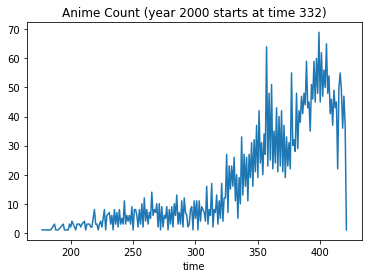

In [126]:
# Plot numbers of anime per season
df_check["count"].plot(title="Anime Count (year 2000 starts at time 332)")

## Calculate Acclaim

In [127]:
# Transform anime membership feature for analysis.
# The scale of anime membership should be logarithmic.
# This is because it will only take a few quality improvement for membership to become tenfold.
from math import log10
if ("members_log" not in df_time.columns):
  df_time.insert(7, "members_log", df_time["members"].apply(lambda x: log10(x)))
df_time.head()

,time,season,anime,score,rank,popularity,members,members_log
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613


In [128]:
# Prepare to scale members feature.
# The chosen training data for the scale to fit is in between 2000 and 2017, inclusive.
df_member_train = pd.DataFrame(data={"members": df_time[(df_time["time"] >= 332) & (df_time["time"] < 404)]["members_log"]})
print(df_member_train.head())
df_member_all = pd.DataFrame(data={"members": df_time["members_log"]})
print(df_member_all.head())

    members
1  5.093162
3  4.148047
4  4.645962
7  4.932174
8  4.766086
    members
1  5.093162
2  4.856227
3  4.148047
4  4.645962
5  3.629613


In [129]:
# Scale members so that it has the same scale as rating.
# The acclaim feature to be calculated has members and ratings factor.
# Scaling members is important so that the number of members do not overwhelm the rating.
# The training period is 2000-2017, the testing period is 2018-2019, the prediction period is 2020-2021.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 10))
scaler.fit(df_member_train)
df_time["members_scaled"] = scaler.transform(df_member_all)
df_time

,time,season,anime,score,rank,popularity,members,members_log,members_scaled
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162,6.843900
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227,6.321226
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047,4.758995
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962,5.857386
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613,3.615340
...,...,...,...,...,...,...,...,...,...
5021,402,Summer 2017,Made in Abyss,8.68,52,95,1104027,6.042980,8.939178
5022,248,Winter 1979,Hana no Ko Lunlun,6.87,4392,7464,4663,3.668665,3.701488
5023,402,Summer 2017,Gamers!,6.81,4647,295,571452,5.756980,8.308267
5024,352,Winter 2005,Lime-iro Ryuukitan X,5.47,10737,7794,4147,3.617734,3.589135


In [130]:
# Calculate acclaim feature.
# The acclaim of an anime is defined to be the average rating of the anime multipled by the number of viewers.
# The acclaim will be high if many viewers view it and give it a high rating.
# A perfect rating with minimal viewers will not score as high.
# On the other hand, a bad rating with lots of viewers will also not score as high.
# The members and ratings are both in the scale of 1-10, so they will contribute equally.
if ("acclaim" not in df_time.columns):
  df_time.insert(9, "acclaim", df_time["score"] * df_time["members_scaled"])
df_time

,time,season,anime,score,rank,popularity,members,members_log,members_scaled,acclaim
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162,6.843900,55.298711
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227,6.321226,37.990566
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047,4.758995,36.501488
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962,5.857386,39.127335
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613,3.615340,24.258934
...,...,...,...,...,...,...,...,...,...,...
5021,402,Summer 2017,Made in Abyss,8.68,52,95,1104027,6.042980,8.939178,77.592061
5022,248,Winter 1979,Hana no Ko Lunlun,6.87,4392,7464,4663,3.668665,3.701488,25.429225
5023,402,Summer 2017,Gamers!,6.81,4647,295,571452,5.756980,8.308267,56.579301
5024,352,Winter 2005,Lime-iro Ryuukitan X,5.47,10737,7794,4147,3.617734,3.589135,19.632567


In [131]:
# Check for seasons which have less than 5 animes.
# This check is for averaging the 5 highest acclaim level into a seasonal aggregate.
# Usually, anime seasons are defined by their top performing animes.
# This is because there are many animes with low production values that is not hyped.
# The acclaim level should not depend on how many low ranking animes there are in a season.
df_check[df_check["count"] < 5]

,season,count
time,,
177,Spring 1961,1
182,Summer 1962,1
184,Winter 1963,1
187,Fall 1963,3
188,Winter 1964,1
...,...,...
310,Summer 1994,3
314,Summer 1995,2
318,Summer 1996,3


In [132]:
# Create a single-variable time series data based on acclaim.
# The acclaim of a season is the average top 5 acclaims in the season.
groupby = df_time.sort_values("acclaim", ascending=False).groupby("time")
df_group = pd.DataFrame(data={"acclaim": groupby["acclaim"].agg(lambda x: x.head(5).mean())})
df_group.head(10)

,acclaim
time,
177,11.656072
182,10.353630
184,31.968613
187,16.077200
188,11.801606
189,13.202998
190,11.843116
194,11.648020
195,26.838891


In [133]:
# Smooth the time series with moving average of 4 periods.
# The members and ratings of an anime in MyAnimeList has some high peaks.
# This is due to the existence of top rated one-hit wonder animes that overall boost the season's acclaim.
# To smoothen this peak, moving average is used, and the value now represents an average acclaim for the past year.
series_smooth = df_group.loc[329:]["acclaim"]
df_smooth = pd.DataFrame(data={"acclaim": series_smooth.rolling(4).mean()})
df_smooth.head(10)

,acclaim
time,
329,NaN
330,NaN
331,NaN
332,47.205416
333,49.153404
334,45.934765
335,44.680575
336,45.791237
337,44.808614


## Exploring Time Series

In [134]:
# Seperate training data from 2000 to 2017, inclusive.
# The data will be divided into training, testing, and prediction data.
# The training data is for modelling.
# The testing data is for validating the model.
# Finally, the prediction data is used to compare with real data to see any deviations from the validated model.
df_train = df_smooth.loc[332:403]
df_train

,acclaim
time,
332,47.205416
333,49.153404
334,45.934765
335,44.680575
336,45.791237
...,...
399,71.686477
400,71.065487
401,70.257343


In [135]:
# Seperate testing data from 2018 to 2019, inclusive.
df_test = df_smooth.loc[404:411]
df_test

,acclaim
time,
404,69.722358
405,69.865659
406,70.468917
407,70.689232
408,72.135727
409,73.217926
410,72.911791
411,71.643476


In [136]:
# Seperate prediction data from 2020 to 2021, inclusive. (COVID-19 period)
df_predict = df_smooth.loc[412:419]
df_predict

,acclaim
time,
412,68.695018
413,66.549721
414,65.906475
415,66.581891
416,68.998947
417,69.878765
418,68.608553
419,68.510468


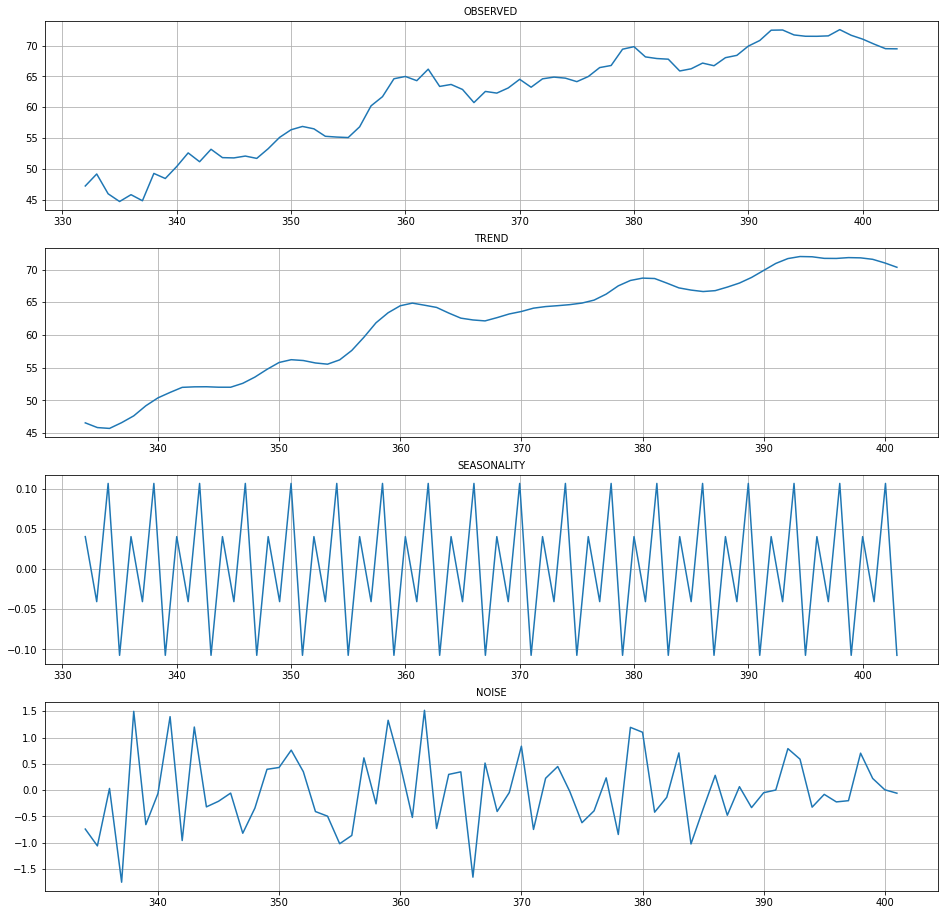

In [137]:
# Decompose time series for analysis
import statsmodels.api as sm
import matplotlib.pyplot as plt

res = sm.tsa.seasonal_decompose(df_train["acclaim"], period=4)
fig, axs = plt.subplots(4, figsize=(16,16))
axs[0].set_title("OBSERVED", fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title("TREND", fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title("SEASONALITY", fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title("NOISE", fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

# Model Data (ARIMA)

## Model Creation

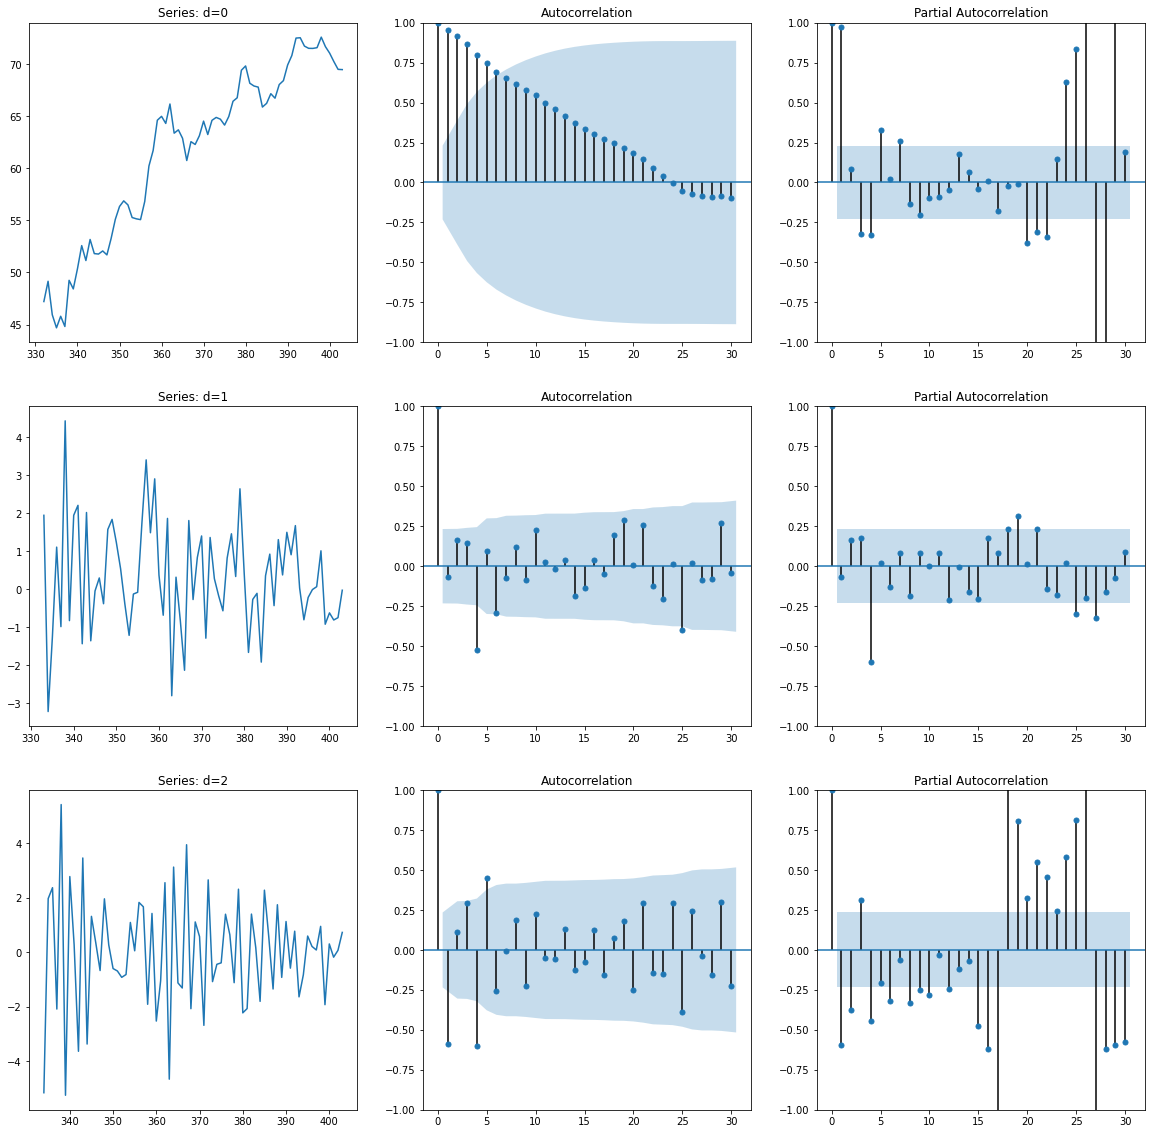

In [138]:
# Plot time series and their correlation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0, 0].plot(df_train)
axes[0, 0].set_title("Series: d=0")
plot_acf(df_train["acclaim"], ax=axes[0, 1], lags=30)
plot_pacf(df_train["acclaim"], ax=axes[0, 2], lags=30)

# 1st Differencing
axes[1, 0].plot(df_train["acclaim"].diff())
axes[1, 0].set_title("Series: d=1")
plot_acf(df_train["acclaim"].diff().dropna(), ax=axes[1, 1], lags=30)
plot_pacf(df_train["acclaim"].diff().dropna(), ax=axes[1, 2], lags=30)

# 2nd Differencing
axes[2, 0].plot(df_train["acclaim"].diff().diff())
axes[2, 0].set_title("Series: d=2")
plot_acf(df_train["acclaim"].diff().diff().dropna(), ax=axes[2, 1], lags=30)
plot_pacf(df_train["acclaim"].diff().diff().dropna(), ax=axes[2, 2], lags=30)

plt.show()

In [139]:
# Fit ARIMA(4,1,4).
# From the plotted data, d=0 is not stationary and has an increasing trend.
# d=2's ACF plot is too negative for q=1 due to over-differencing.
# d=1 is chosen, and their corresponding p and q is 4 and 4, from PACF and ACF, respectively.
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train["acclaim"],order=(4,1,4))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                acclaim   No. Observations:                   72
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -106.690
Date:                Thu, 14 Apr 2022   AIC                            231.380
Time:                        06:47:21   BIC                            251.744
Sample:                             0   HQIC                           239.478
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2389      0.359     -0.666      0.505      -0.942       0.464
ar.L2          0.2339      0.327      0.715      0.475      -0.407       0.875
ar.L3          0.0795      0.195      0.408      0.683      -0.302       0.461
ar.L4         -0.4520      0.153     -2.948      0.003      -0.753      -0.151
ma.L1          0.3656      0.371      0.986      0.324      -0.361       1.092
ma.L2          0.1978      0.402      0.492      0.623      -0.591       0.986
ma.L3          0.3525      0.356      0.990      0.322      -0.345       1.050
ma.L4         -0.0964      0.332     -0.291      0.771      -0.746       0.554
sigma2         1.1383      0.236      4.832      0.000       0.677       1.600
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.93   Prob(JB):                         0.64
Heteroskedasticity (H):               0.78   Skew:                            -0.15
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

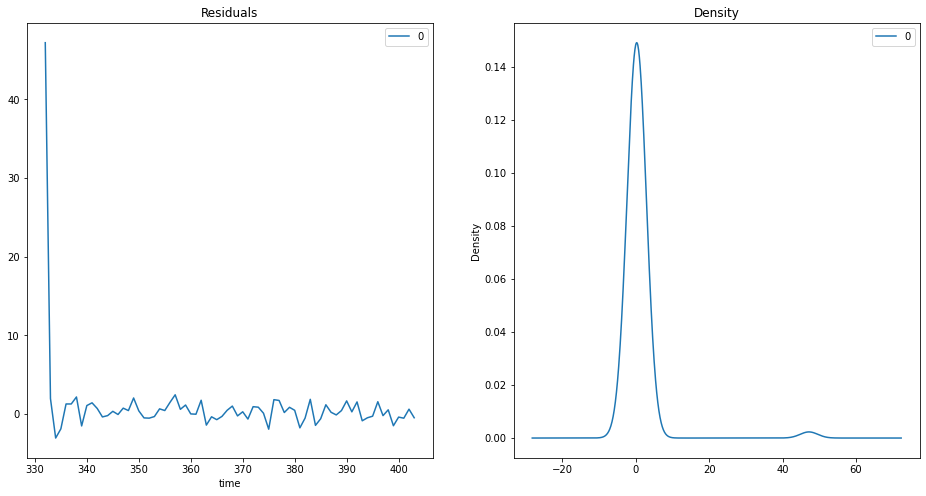

In [140]:
# Plot residual errors.
# To ensure that all trends and seasonality are captured in the model, residuals are inspected.
# The first residual is due to first-order differencing.
# There seems to be no pattern within the residual.
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Training Data

In [141]:
# Predict acclaim. The fist value is zero due to differencing.
df_train["acclaim_pred"] = result.predict()
df_train.head(10)

,acclaim,acclaim_pred
time,,
332,47.205416,0.000000
333,49.153404,47.205408
334,45.934765,49.005994
335,44.680575,46.584295
336,45.791237,44.530184
337,44.808614,43.548526
338,49.243936,47.093241
339,48.419327,49.951515
340,50.368392,49.310926


In [142]:
# Measure model training performance. MAPE is less than 5%, but testing performance must also be checked.
from sklearn import metrics

acclaim_actual = df_train["acclaim"].loc[333:]
acclaim_pred = df_train["acclaim_pred"].loc[333:]

print('(MAE) Mean Absolute Error is:\n', metrics.mean_absolute_error(acclaim_actual, acclaim_pred), '\n')
print('(MSE) Mean Squared Error is:\n', metrics.mean_squared_error(acclaim_actual, acclaim_pred), '\n')
print('(MAPE) Mean Absolute Percentage Error is:\n', 
      metrics.mean_absolute_percentage_error(acclaim_actual, acclaim_pred), '\n')
print('(R^2) Coefficient of Determination is:\n', metrics.r2_score(acclaim_actual, acclaim_pred), '\n')

(MAE) Mean Absolute Error is:
 0.9019361693723408 

(MSE) Mean Squared Error is:
 1.2678215342044463 

(MAPE) Mean Absolute Percentage Error is:
 0.015285779188376996 

(R^2) Coefficient of Determination is:
 0.9802651667406256 



## Testing Data

In [143]:
# Predict acclaim for years 2018 and 2019
df_test_result = pd.DataFrame(data={
    "acclaim": df_test["acclaim"].values.tolist(), 
    "acclaim_pred": result.predict(start=72, end=79).tolist()
})
df_test_result

,acclaim,acclaim_pred
0,69.722358,69.320048
1,69.865659,69.826807
2,70.468917,69.771160
3,70.689232,69.948018
4,72.135727,70.008409
5,73.217926,69.801864
6,72.911791,69.904539
7,71.643476,69.756570


In [144]:
# Measure model training performance. MAPE is less than 5%, so the model is totally acceptable.
from sklearn import metrics

acclaim_test_actual = df_test_result["acclaim"]
acclaim_test_pred = df_test_result["acclaim_pred"]

print('(MAE) Mean Absolute Error is:\n', metrics.mean_absolute_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(MSE) Mean Squared Error is:\n', metrics.mean_squared_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(MAPE) Mean Absolute Percentage Error is:\n', 
      metrics.mean_absolute_percentage_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(R^2) Coefficient of Determination is:\n', metrics.r2_score(acclaim_test_actual, acclaim_test_pred), '\n')

(MAE) Mean Absolute Error is:
 1.5397088577939808 

(MSE) Mean Squared Error is:
 3.7498210764823647 

(MAPE) Mean Absolute Percentage Error is:
 0.021305314501417497 

(R^2) Coefficient of Determination is:
 -1.3630930744177152 



## Prediction Data

In [145]:
# Predict acclaim for years 2020 and 2021
df_predict_result = pd.DataFrame(data={
    "acclaim": df_predict["acclaim"].values.tolist(), 
    "acclaim_pred": result.predict(start=80, end=87).tolist()
})
df_predict_result

,acclaim,acclaim_pred
0,68.695018,69.772208
1,66.549721,69.835389
2,65.906475,69.765780
3,66.581891,69.865310
4,68.998947,69.823211
5,69.878765,69.822452
6,68.608553,69.852164
7,68.510468,69.796554


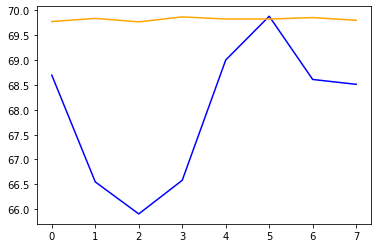

In [146]:
# Plot actual acclaim against the predicted values.
# Performance is not measured here since the model is already validated during testing prediction.
acclaim_predict_actual = df_predict_result["acclaim"]
acclaim_predict_pred = df_predict_result["acclaim_pred"]

acclaim_predict_actual.plot(color="blue")
acclaim_predict_pred.plot(color="orange")
plt.show()

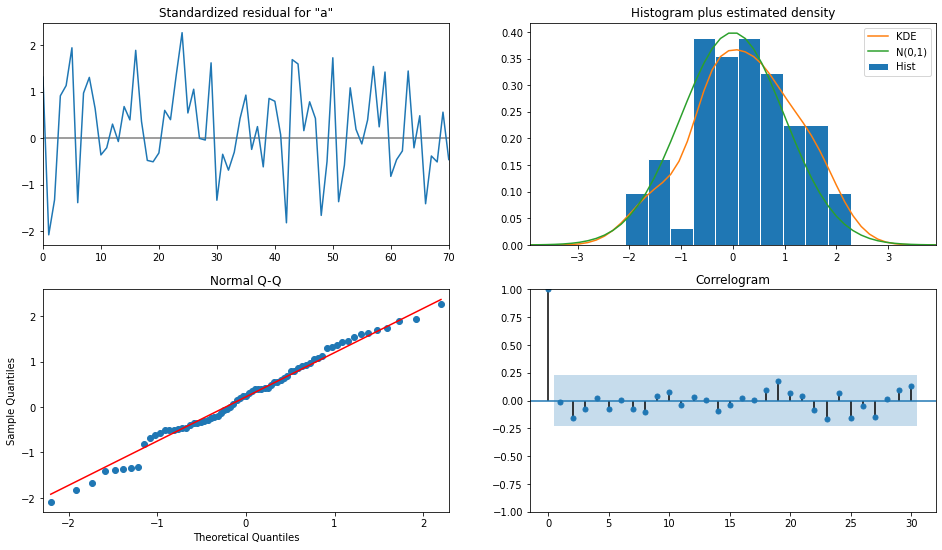

In [147]:
# Model diagnostics
result.plot_diagnostics(figsize=(16,9), lags=30)
plt.show()

In [148]:
# Full prediction result (2000-2021)
df_full = df_smooth.loc[333:419]
df_full_result = pd.DataFrame(data={
    "acclaim": df_full["acclaim"].values.tolist(),
    "acclaim_pred": result.predict(start=1, end=87).tolist()
})
df_full_result.tail(16)

,acclaim,acclaim_pred
71,69.722358,69.320048
72,69.865659,69.826807
73,70.468917,69.771160
74,70.689232,69.948018
75,72.135727,70.008409
76,73.217926,69.801864
77,72.911791,69.904539
78,71.643476,69.756570
79,68.695018,69.772208
80,66.549721,69.835389


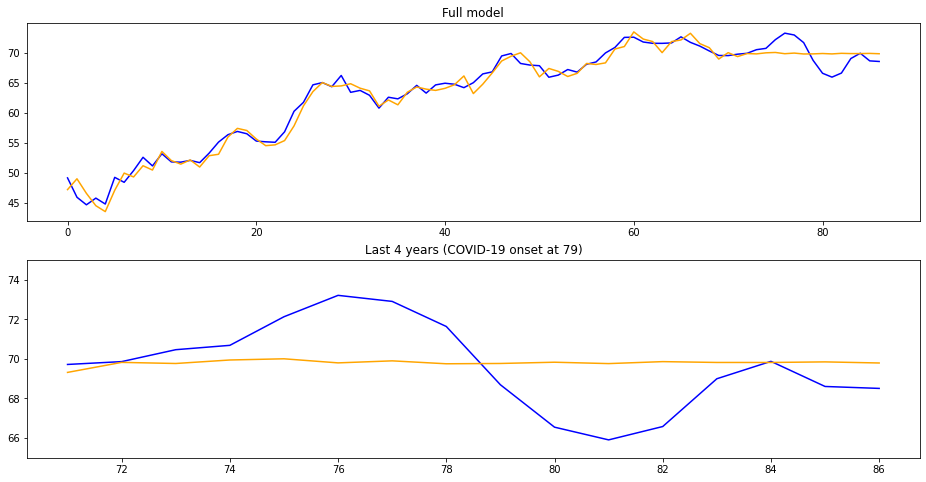

In [149]:
# Plot actual and predicted acclaim values
fig, axes = plt.subplots(2, figsize=(16, 8))

df_full_result["acclaim"].plot(color="blue", ax=axes[0], title="Full model")
df_full_result["acclaim_pred"].plot(color="orange", ax=axes[0])

df_full_result["acclaim"].loc[71:86].plot(color="blue", ax=axes[1], title="Last 4 years (COVID-19 onset at 79)")
df_full_result["acclaim_pred"].loc[71:86].plot(color="orange", ax=axes[1])
axes[1].set_ylim([65, 75])

plt.show()

From the model, we see that ARIMA always give the same prediction after the training period.

This is because the ARIMA model depends on the existence of the previous timesteps in order to calculate moving average.

Since the train data available to the model is at most 2017, predicting anime acclaim for 2021 is unreasonable.

In other words, ARIMA is a single step model, it can only predict one timestep in the future.

Therefore, we will disregard this model and use a multi step model, which is LSTM.

# Model Data (LSTM)

## Further Preprocessing

In [150]:
# Eliminate the randomness for reproducibility
import os
os.environ["PYTHONHASHSEED"] = "0"
os.environ["TF_DETERMINISTIC_OPS"] = "0"
os.environ["CUDA_VISBLE_DEVICE"] = ""

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [151]:
# Capture all acclaim data from 2000 to 2021
df_model = df_smooth.loc[332:419].reset_index()
df_model = df_model.drop("time", axis=1)
df_model

,acclaim
0,47.205416
1,49.153404
2,45.934765
3,44.680575
4,45.791237
...,...
83,66.581891
84,68.998947
85,69.878765
86,68.608553


In [152]:
# Scale acclaim feature.
# The LSTM model will initialize the kernel as a zero value.
# If the acclaim feature is scaled to be from 0 to 1, the LSTM will fit the data faster.
# The training data from 2000-2017 is fit to the scaler, then all data is transformed.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_model[0:71])

df_scaled = df_model.copy()
df_scaled["acclaim"] = scaler.transform(df_model)
df_scaled

,acclaim
0,0.090414
1,0.160171
2,0.044912
3,0.000000
4,0.039772
...,...
83,0.784279
84,0.870833
85,0.902339
86,0.856853


In [153]:
# Seperate training, testing, and prediction data
df_train = df_scaled[0:72]
df_test = df_scaled[64:80]
df_predict = df_scaled[72:88]
df_predict

,acclaim
72,0.896738
73,0.901870
74,0.923472
75,0.931362
76,0.983160
77,1.021913
78,1.010951
79,0.965533
80,0.859949
81,0.783127


## LSTM Input Processing

In [154]:
# Create a window class.
# This class specifies the input and output values of LSTM.
# Input width is the number of input timesteps.
# Label width is the number of output timesteps.
# Shift is the number of timesteps between the last input and the last output.
class WindowGenerator():
  def __init__(self, input_width, label_width, shift):
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.labels_slice = slice(self.total_window_size - self.label_width, None)

In [155]:
# Create a split function.
# This function splits the dataset into input and labels for output.
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [156]:
# Create dataset generation function.
# LSTM models require input to be 3-dimensional.
# The dimensions are batch size, timesteps, and features.
# The generation is based upon a Keras utility function.
import numpy as np
import tensorflow as tf

BATCH_SIZE = 32

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      batch_size=BATCH_SIZE,
      seed=0)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

## Model Creation

In [157]:
# Create LSTM model.
# There will be 32 node in this LSTM.
# The model predicts the next 8 timesteps given the previous 8 timesteps and its short-term memory.
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import LSTM, Dense, Reshape
from tensorflow.python.keras.initializers import zeros

STEPS = 8
UNITS = 32

model = Sequential()
model.add(LSTM(UNITS, return_sequences=False))
model.add(Dense(STEPS, kernel_initializer=zeros()))
model.add(Reshape([STEPS, 1]))

In [158]:
# Create an object that can create LSTM dataset with specified configuration.
window = WindowGenerator(input_width=STEPS, label_width=STEPS, shift=STEPS)

In [159]:
# Fit the LSTM model to training data, running for 200 epochs.
MAX_EPOCHS = 200

model.compile(loss='mse', optimizer='adam', metrics=['mape'])
history = model.fit(window.make_dataset(df_train), epochs=MAX_EPOCHS)

Epoch 1/200
2/2 [==============================] - 4s 27ms/step - loss: 0.5129 - mape: 99.8244
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 0.5046 - mape: 98.9564
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4956 - mape: 98.0169
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 0.4856 - mape: 96.9688
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 0.4744 - mape: 95.7909
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4619 - mape: 94.4577
Epoch 7/200
2/2 [==============================] - 0s 17ms/step - loss: 0.4478 - mape: 92.9377
Epoch 8/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4319 - mape: 91.1928
Epoch 9/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4137 - mape: 89.1759
Epoch 10/200
2/2 [==============================] - 0s 38ms/step - loss: 0.3931 - mape: 86.8294
Epoch 11/200
2/2 [==============================]

In [160]:
# Print model description
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 1)              0         
Total params: 4,616
Trainable params: 4,616
Non-trainable params: 0
_________________________________________________________________


## Evaluate Performance

In [161]:
# Evaluate MAPE for training data
model.evaluate(window.make_dataset(df_train))

2/2 [==============================] - 1s 16ms/step - loss: 0.0069 - mape: 11.1051


[0.006896934937685728, 11.105128288269043]

In [162]:
# Evaluate MAPE for testing data.
# The MAPE is less than 5%, so the model is acceptable.
# The testing data performs much better than training data in terms of MAPE.
# That is because tthe acclaim feature is scaled from around 40-70 to 0-1.
# The training performance should have been similar in terms of residues.
# However, the training data start from around 40, which is scaled to 0.
# The scaled training data is then sensitive to small changes in term of percentage.
model.evaluate(window.make_dataset(df_test))

1/1 [==============================] - 0s 140ms/step - loss: 7.7003e-04 - mape: 2.2462


[0.0007700334535911679, 2.246246337890625]

## Plot Result

In [163]:
# Predict testing data, reshape testing prediction, and undo the scale
test_pred_dataset = model.predict(window.make_dataset(df_test))
test_pred_array = test_pred_dataset[0].reshape(1, -1)[0]
test_pred_acclaim = scaler.inverse_transform([test_pred_array]).reshape(1, -1)[0]
test_pred_acclaim

array([69.88435802, 70.25086251, 70.64691991, 71.00519686, 71.33419385,
       71.6207415 , 71.85922217, 72.08670226])

In [164]:
# Reshape testing data, and undo the scale
test_actual_dataset = df_test["acclaim"]
test_actual_array = test_actual_dataset.to_numpy()[8:]
test_actual_acclaim = scaler.inverse_transform([test_actual_array]).reshape(1, -1)[0]
test_actual_acclaim

array([69.72235796, 69.86565855, 70.46891667, 70.68923217, 72.13572656,
       73.21792629, 72.9117912 , 71.64347623])

In [165]:
# Predict prediction data, reshape prediction, and undo the scale
predict_pred_dataset = model.predict(window.make_dataset(df_predict))
predict_pred_array = predict_pred_dataset[0].reshape(1, -1)[0]
predict_pred_acclaim = scaler.inverse_transform([predict_pred_array]).reshape(1, -1)[0]
predict_pred_acclaim

array([69.75529556, 70.11851103, 70.51120618, 70.86631061, 71.19279091,
       71.47710815, 71.71371627, 71.93937042])

In [166]:
# Reshape prediction data, and undo the scale
predict_actual_dataset = df_predict["acclaim"]
predict_actual_array = predict_actual_dataset.to_numpy()[8:]
predict_actual_acclaim = scaler.inverse_transform([predict_actual_array]).reshape(1, -1)[0]
predict_actual_acclaim

array([68.69501788, 66.54972141, 65.90647458, 66.58189073, 68.99894725,
       69.87876463, 68.60855258, 68.51046829])

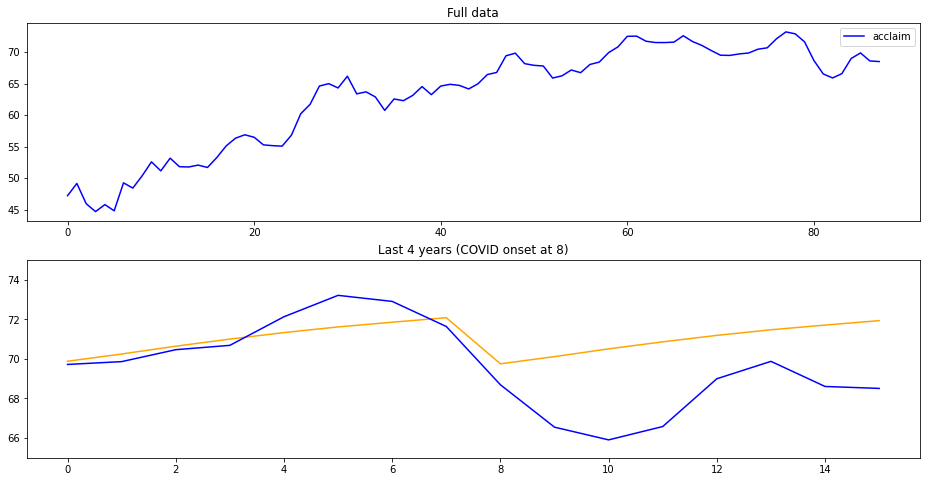

In [167]:
# Concatenate testing and prediction data, and plot the prediction versus actual data.
# The prediction comes in bundle of 8 timesteps.
# Since 8 new timesteps is given for prediction data, the prediction takes a dip due to the new data given.
pred_acclaim = np.concatenate([test_pred_acclaim, predict_pred_acclaim])
actual_acclaim = np.concatenate([test_actual_acclaim, predict_actual_acclaim])

fig, axes = plt.subplots(2, figsize=(16, 8))

df_model.plot(ax=axes[0], color="blue", title="Full data")

plt.plot(pred_acclaim, color="orange")
plt.plot(actual_acclaim, color="blue")
axes[1].set_ylim([65, 75])
axes[1].set_title("Last 4 years (COVID onset at 8)")

plt.show()

From model performance metric, the model is acceptable.

Yet, it does not predict a dip in acclaim after the onset of COVID-19.

Therefore, we can say that the COVID-19 pandemic is correlated to the decrase in anime popularity.

One of the reasons why this could happen is due to the loss in production values.

Since the anime sales fell, we may expect the quality to also fall.

This could result in loss of rating and thus, loss of acclaim.

Another reason is that the new animes have not gained enough audience.

Even though the COVID-19 pandemic could have allowed more people watch more anime, the new seasonal animes have not obtained as much viewership as the old classics.

However, this may not be as likely since there are many famous animes like Jujutsu Kaisen and Attack on Titan that garnered over a million of audience.

It is also possible that COVID-19 causes a reduction to TV slots for new series to be aired, effectively letting old shows be rerun, reducing the cost.

In any case, both ARIMA and LSTM models show that the dip in anime acclaim is caused by unwarranted fluctuations, most possibly by COVID-19.

### So, my conclusion is that the loss of sales since 2020 due to COVID-19 have perhaps affected the anime quality, but definitely affected the rating and viewership of animes in general.





# References

MyAnimeList: https://myanimelist.net/anime/season/archive

Web Scraper: https://webscraper.io/

ARIMA model reference: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

LSTM model reference: https://www.tensorflow.org/tutorials/structured_data/time_series

Anime sales drop: https://www.japantimes.co.jp/news/2021/08/15/business/anime-industry-sales/